# TP2

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - María Fabiana Cid
#### - Yessika Arrieta

In [1]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


TP2 - CLASE 3

▪ Objetivo:
Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan las
cámaras digitales modernas. El video a procesar será: “focus_video.mov”.
1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image
Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:
1. Medición sobre todo el frame.
2. Medición sobre una ROI ubicada en el centro del frame.  Area de la ROI = 5 o 10% del area total del frame.
3. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores 
arbitrarios, probar con varios valores 3x3, 7x5, etc ... (al menos 3) 
Para cada experimento se debe presentar :
- Una curva o varias curvas que muestren la evolución de la métrica frame a frame donde se vea claramente cuando el algoritmo detecto el punto 
de máximo enfoque.
- Video con la ROI o matriz,  graficada en rojo y superpuesta al video original para los frames que no están en foco y verde para los frames
donde se detecta la condición de máximo enfoque.
2. Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure 
operators in shapefrom focus.
1. Medicion de foco en toda la imagen
El algoritmo de detección a implementar debe detectar y devolver los puntos de máximo enfoque de manera 
automática.


### 1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:

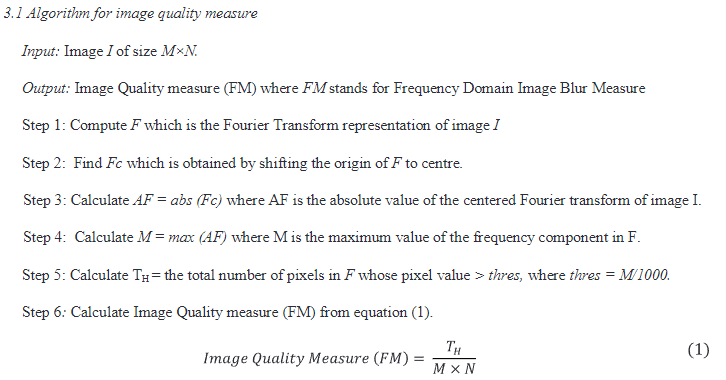

In [28]:
def image_quality_measure(frame):
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(frame)
    
    # Step 2: Find Fc which is obtained by shifting the origin of F to the center
    Fc = np.fft.fftshift(F)
    
    # Step 3: Calculate AF = abs(Fc) where AF is the absolute value of the centered Fourier transform
    AF = np.abs(Fc)
    
    # Step 4: Calculate M = max(AF) where M is the maximum value of the frequency component in F
    M = np.max(AF)
    
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > M/1000
    thres = M / 1000
    TH = np.sum(AF > thres)
    
    # Step 6: Calculate Image Quality Measure (FM)
    M, N = frame.shape
    FM = TH / (M * N)
    
    return FM


#### 1. Medición sobre todo el frame.

Frame 0: Image Quality Measure (FM) = 0.007035590277777778
Frame 1: Image Quality Measure (FM) = 0.006983506944444444
Frame 2: Image Quality Measure (FM) = 0.0069487847222222225
Frame 3: Image Quality Measure (FM) = 0.006905381944444444
Frame 4: Image Quality Measure (FM) = 0.006957465277777778
Frame 5: Image Quality Measure (FM) = 0.006792534722222222
Frame 6: Image Quality Measure (FM) = 0.006827256944444445
Frame 7: Image Quality Measure (FM) = 0.006775173611111111
Frame 8: Image Quality Measure (FM) = 0.006775173611111111
Frame 9: Image Quality Measure (FM) = 0.006766493055555556
Frame 10: Image Quality Measure (FM) = 0.006766493055555556
Frame 11: Image Quality Measure (FM) = 0.0067317708333333335
Frame 12: Image Quality Measure (FM) = 0.006749131944444445
Frame 13: Image Quality Measure (FM) = 0.006766493055555556
Frame 14: Image Quality Measure (FM) = 0.0067578125
Frame 15: Image Quality Measure (FM) = 0.006697048611111111
Frame 16: Image Quality Measure (FM) = 0.006731770833333

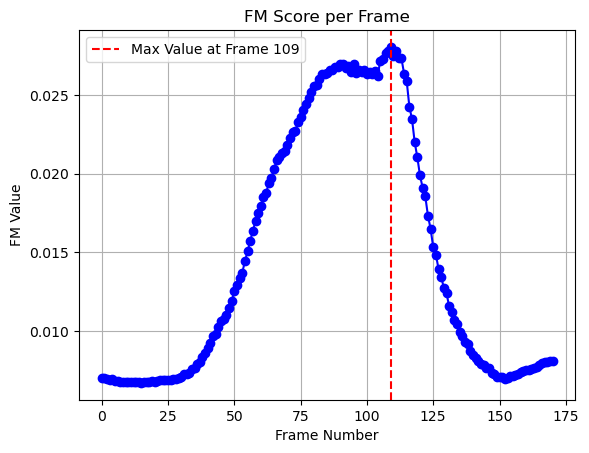

End of video.


In [29]:
# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    fm_scores = []  # List to store FM values
    frame_number = 0
    frame_numbers = []  # List to store frame numbers
    while True:
        # Read frame by frame
        ret, frame = cap.read()
        
        # If there are no more frames to read, break the loop
        if not ret:
            print("End of video or error reading video.")
            break
        
        # Convert the frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Call the image quality measure function for the current frame
        fm_value = image_quality_measure(gray_frame)
        
        # Store the FM value and frame number in the respective lists
        fm_scores.append(fm_value)
        frame_numbers.append(frame_number)
        
        print(f"Frame {frame_number}: Image Quality Measure (FM) = {fm_value}")
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()
    
    # Find the frame with the maximum FM value
    max_fm_value = max(fm_scores)
    max_fm_index = fm_scores.index(max_fm_value)
    
    print(f"Frame with the highest FM score: {max_fm_index} with FM value {max_fm_value}")
    
    # Plot FM score per frame
    plt.plot(frame_numbers, fm_scores, marker='o', linestyle='-', color='b')
    plt.axvline(x=max_fm_index, color='r', linestyle='--', label=f'Max Value at Frame {max_fm_index}')
    plt.title("FM Score per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("FM Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Play the video and highlight the frame with the highest FM score
    cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        
        # Highlight the frame with the maximum FM score by drawing a red rectangle
        if frame_number == max_fm_index:
            # Draw a red rectangle on the frame to highlight it
            height, width, _ = frame.shape
            cv.rectangle(frame, (10, 10), (width - 10, height - 10), (0, 0, 255), 5)
            cv.putText(frame, f"Max FM (FM: {max_fm_value:.3f}, Frame {max_fm_index})", (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Display the frame
            cv.imshow('Video', frame)
            
            # Pause and wait for a key press to continue
            cv.waitKey(0)  # This will pause the video until any key is pressed
            
        else:
            # Display the frame
            cv.imshow('Video', frame)
        
        # Wait for 25 ms between frames (adjust to control playback speed)
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()

#### 2. Medición sobre una ROI ubicada en el centro del frame.  Area de la ROI = 5 o 10% del area total del frame.

In [25]:
def extract_roi(image, roi_fraction=0.1):
    """Extracts a central region of interest (ROI) covering a given fraction of the frame."""
    height, width = image.shape
    roi_height = int(height * roi_fraction)
    roi_width = int(width * roi_fraction)
    
    # Center coordinates
    center_x, center_y = width // 2, height // 2
    
    # Calculate ROI bounds
    x_start = center_x - roi_width // 2
    y_start = center_y - roi_height // 2
    x_end = center_x + roi_width // 2
    y_end = center_y + roi_height // 2
    
    # Extract and return the ROI
    return image[y_start:y_end, x_start:x_end]

Frame 0: Image Quality Measure (FM) for ROI = 0.1323784722222222
Frame 1: Image Quality Measure (FM) for ROI = 0.1323784722222222
Frame 2: Image Quality Measure (FM) for ROI = 0.1401909722222222
Frame 3: Image Quality Measure (FM) for ROI = 0.1427951388888889
Frame 4: Image Quality Measure (FM) for ROI = 0.1618923611111111
Frame 5: Image Quality Measure (FM) for ROI = 0.16015625
Frame 6: Image Quality Measure (FM) for ROI = 0.17317708333333334
Frame 7: Image Quality Measure (FM) for ROI = 0.17838541666666666
Frame 8: Image Quality Measure (FM) for ROI = 0.18446180555555555
Frame 9: Image Quality Measure (FM) for ROI = 0.19140625
Frame 10: Image Quality Measure (FM) for ROI = 0.1931423611111111
Frame 11: Image Quality Measure (FM) for ROI = 0.18619791666666666
Frame 12: Image Quality Measure (FM) for ROI = 0.19140625
Frame 13: Image Quality Measure (FM) for ROI = 0.19227430555555555
Frame 14: Image Quality Measure (FM) for ROI = 0.19227430555555555
Frame 15: Image Quality Measure (FM) f

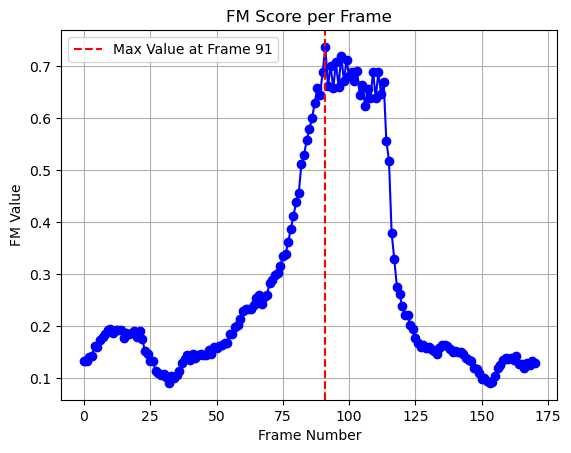

Pausing on frame with max FM score. Press any key to continue...
End of video.


In [30]:
# Example usage for video:
video_path = "focus_video.mov"  # Replace with your video path
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    fm_scores = []  # List to store FM values
    frame_number = 0
    frame_numbers = []  # List to store frame numbers
    while True:
        # Read frame by frame
        ret, frame = cap.read()
        
        # If there are no more frames to read, break the loop
        if not ret:
            print("End of video or error reading video.")
            break
        
        # Convert the frame to grayscale
        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Extract the central 10% ROI from the frame
        roi_frame = extract_roi(gray_frame, roi_fraction=0.1)
        
        # Call the image quality measure function for the ROI
        fm_value = image_quality_measure(roi_frame)
        
        # Store the FM value and frame number in the respective lists
        fm_scores.append(fm_value)
        frame_numbers.append(frame_number)
        
        print(f"Frame {frame_number}: Image Quality Measure (FM) for ROI = {fm_value}")
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()
    
    # Find the frame with the maximum FM value
    max_fm_value = max(fm_scores)
    max_fm_index = fm_scores.index(max_fm_value)
    
    print(f"Frame with the highest FM score: {max_fm_index} with FM value {max_fm_value}")

    #Lineplot of FM score per frame
    plt.plot(frame_numbers, fm_scores, marker='o', linestyle='-', color='b')
    plt.axvline(x=max_fm_index, color='r', linestyle='--', label=f'Max Value at Frame {max_fm_index}')
    plt.title("FM Score per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("FM Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Play the video and highlight the frame with the highest FM score
    cap = cv.VideoCapture(video_path)  # Reopen the video to replay it
    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        
        # Highlight the frame with the maximum FM score by drawing a red rectangle around the ROI
        if frame_number == max_fm_index:
            # Draw a red rectangle on the frame to highlight the 10% ROI
            height, width, _ = frame.shape
            roi_height = int(height * 0.1)
            roi_width = int(width * 0.1)
            center_x, center_y = width // 2, height // 2
            x_start = center_x - roi_width // 2
            y_start = center_y - roi_height // 2
            x_end = center_x + roi_width // 2
            y_end = center_y + roi_height // 2

            cv.rectangle(frame, (x_start, y_start), (x_end, y_end), (0, 0, 255), 5)
            cv.putText(frame, f"Max FM Frame (FM: {max_fm_value:3f})", (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Pause and wait for a key press to continue
            print("Pausing on frame with max FM score. Press any key to continue...")
            cv.imshow('Video', frame)
            cv.waitKey(0)  # Pause until any key is pressed
            
        else:
            # Display the frame without a highlight
            cv.imshow('Video', frame)
        
        # Wait for 25 ms between frames (adjust to control playback speed)
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
        
        # Increment frame number
        frame_number += 1
    
    # Release the video capture object
    cap.release()
    cv.destroyAllWindows()

#### 3. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc ... (al menos 3)

In [40]:
def image_quality_measure_matrix(frame):
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(frame)
    
    # Step 2: Find Fc which is obtained by shifting the origin of F to the center
    Fc = np.fft.fftshift(F)
    
    # Step 3: Calculate AF = abs(Fc) where AF is the absolute value of the centered Fourier transform
    AF = np.abs(Fc)
    
    # Step 4: Calculate M = max(AF) where M is the maximum value of the frequency component in F
    M = np.max(AF)
    
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > M/1000
    thres = M / 200
    TH = np.sum(AF > thres)
    
    # Step 6: Calculate Image Quality Measure (FM)
    M, N = frame.shape
    FM = TH / (M * N)
    
    return FM

In [34]:
def draw_focus_matrix(frame, n, m, square_size, padding=0):
    """Draw a focus matrix of n x m squares, each with size square_size x square_size, with optional padding."""
    height, width = frame.shape[:2]
    
    # Calculate the total matrix size including padding
    matrix_height = n * square_size + (n - 1) * padding
    matrix_width = m * square_size + (m - 1) * padding
    
    # Ensure matrix size does not exceed the frame size
    if matrix_height > height or matrix_width > width:
        print("Matrix size exceeds frame dimensions.")
        return frame, None
    
    # Calculate the top-left corner to center the matrix
    start_y = (height - matrix_height) // 2
    start_x = (width - matrix_width) // 2
    
    focus_matrix = np.zeros((n, m))  # Create an empty focus matrix
    
    # Process each grid cell
    for i in range(n):
        for j in range(m):
            # Calculate the top-left corner of the current grid square
            y_start = start_y + i * (square_size + padding)
            y_end = y_start + square_size
            x_start = start_x + j * (square_size + padding)
            x_end = x_start + square_size
            
            # Ensure ROI is within the frame boundaries
            if y_end > height or x_end > width:
                print(f"ROI out of bounds: {x_start}, {y_start}, {x_end}, {y_end}")
                continue
            
            # Extract the region of interest (ROI) for the current grid square
            roi = frame[y_start:y_end, x_start:x_end]
            
            # Check if the ROI is valid (non-empty)
            if roi.size == 0:
                print(f"Empty ROI at grid ({i}, {j})")
                continue
            
            # Convert the ROI to grayscale
            gray_roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
            
            # Calculate the FM score for the ROI
            fm_value = image_quality_measure_matrix(gray_roi)
            focus_matrix[i, j] = fm_value
            
            # Draw a rectangle and color it based on FM score
            color = (0, 255, 0) if fm_value > 0.3 else (0, 0, 255)  # Green if in focus, red if out of focus
            cv.rectangle(frame, (x_start, y_start), (x_end, y_end), color, 2)
    
    return frame, focus_matrix

In [42]:
def display_video_with_matrix(m, n, square_size=10, padding=10):
    video_path = "focus_video.mov"  # Replace with your video path
    cap = cv.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video.")
    else:
        # Create an array to track FM scores for each grid square
        fm_scores_per_square = [[[] for _ in range(m)] for _ in range(n)]
        frame_number = 0

        while True:
            ret, frame = cap.read()
        
            if not ret:
                print("End of video.")
                break
        
            # Draw the focus matrix on the frame with padding
            processed_frame, focus_matrix = draw_focus_matrix(frame, n, m, square_size, padding)
        
            if focus_matrix is not None:
                # Track FM scores for each grid square
                for i in range(n):
                    for j in range(m):
                        fm_scores_per_square[i][j].append(focus_matrix[i, j])
        
                # Display the frame with the focus matrix
                cv.imshow('Focus Matrix', processed_frame)
        
            frame_number += 1
        
            # Wait for 25 ms between frames (adjust to control playback speed)
            if cv.waitKey(25) & 0xFF == ord('q'):
                break
    
        # Release the video capture object
        cap.release()
        cv.destroyAllWindows()
    
        # Plot all FM scores for each square in a single figure using subplots
        fig, axs = plt.subplots(n, m, figsize=(m * 4, n * 4))  # Create n x m subplots
        
        for i in range(n):
            for j in range(m):
                axs[i, j].plot(fm_scores_per_square[i][j], marker='o', linestyle='-', color='b')
                axs[i, j].set_title(f"Grid ({i}, {j})")
                axs[i, j].set_xlabel("Frame Number")
                axs[i, j].set_ylabel("FM Value")
                axs[i, j].grid(True)
        
        plt.tight_layout()
        plt.show()

##### Matriz de 3x4

End of video.


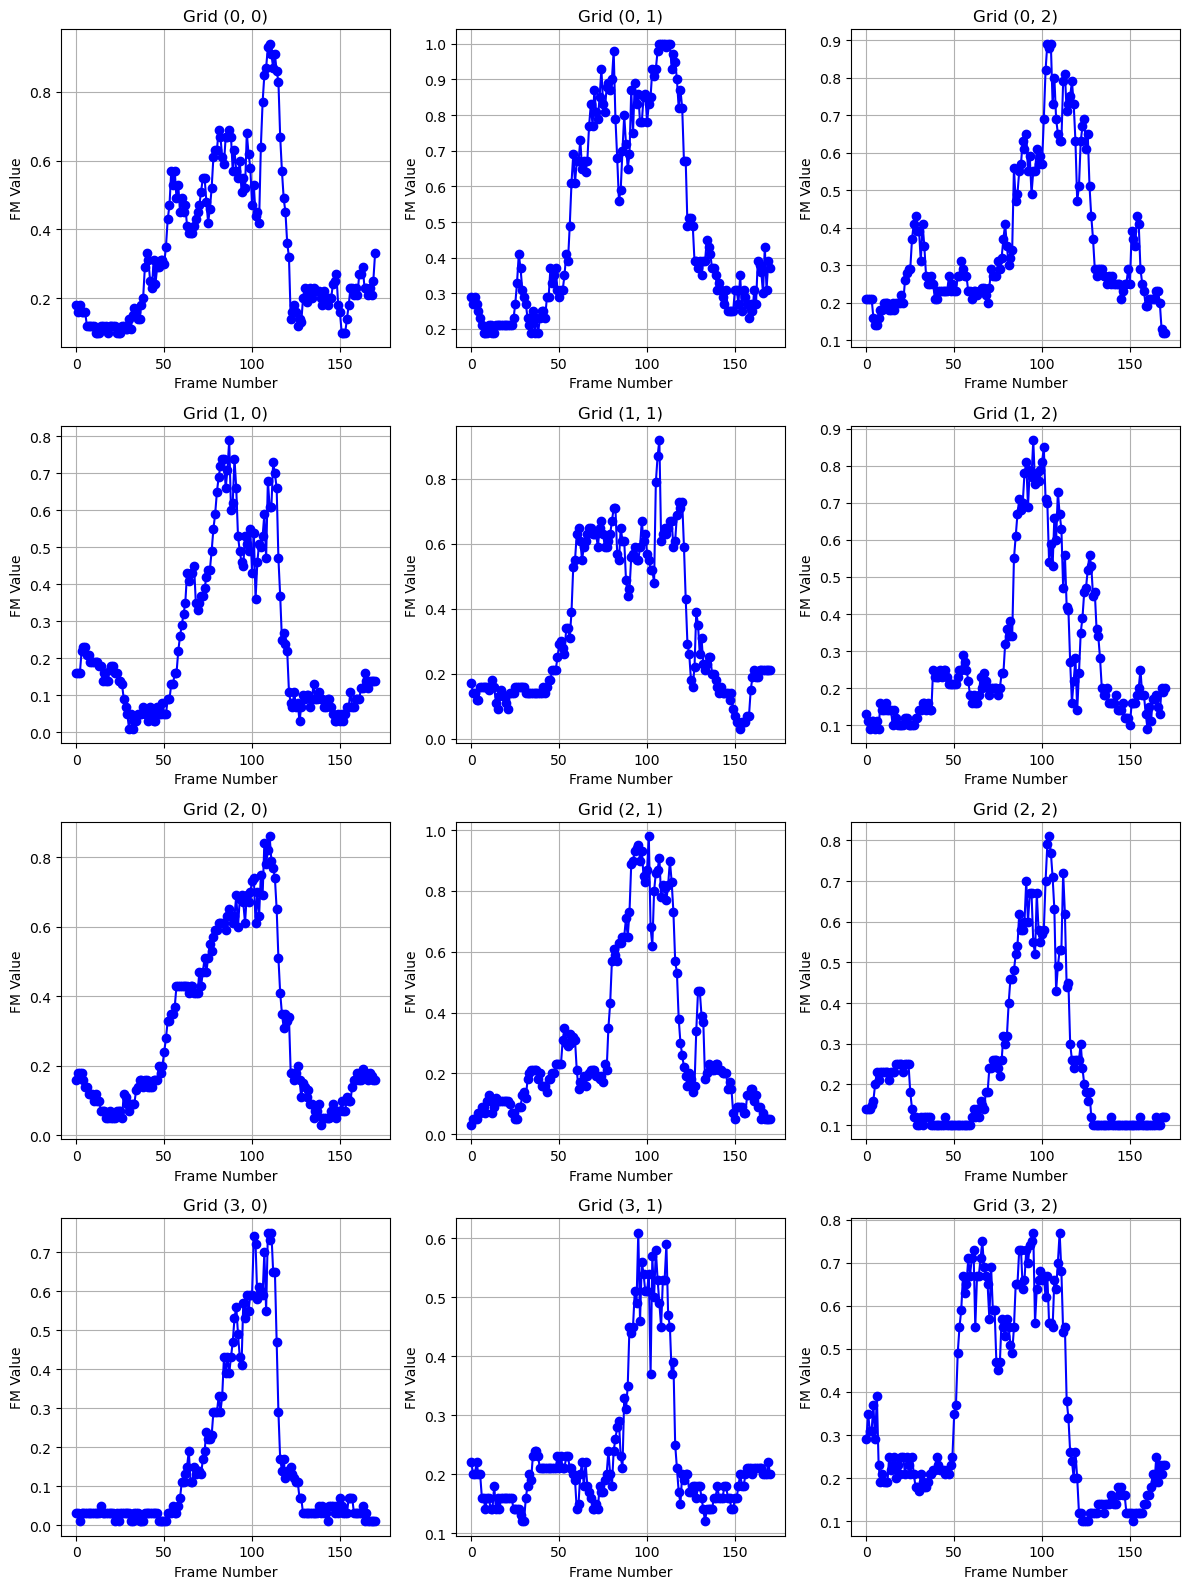

In [46]:
display_video_with_matrix(3, 4, 10, 10)

##### Matriz de 4x5

End of video.


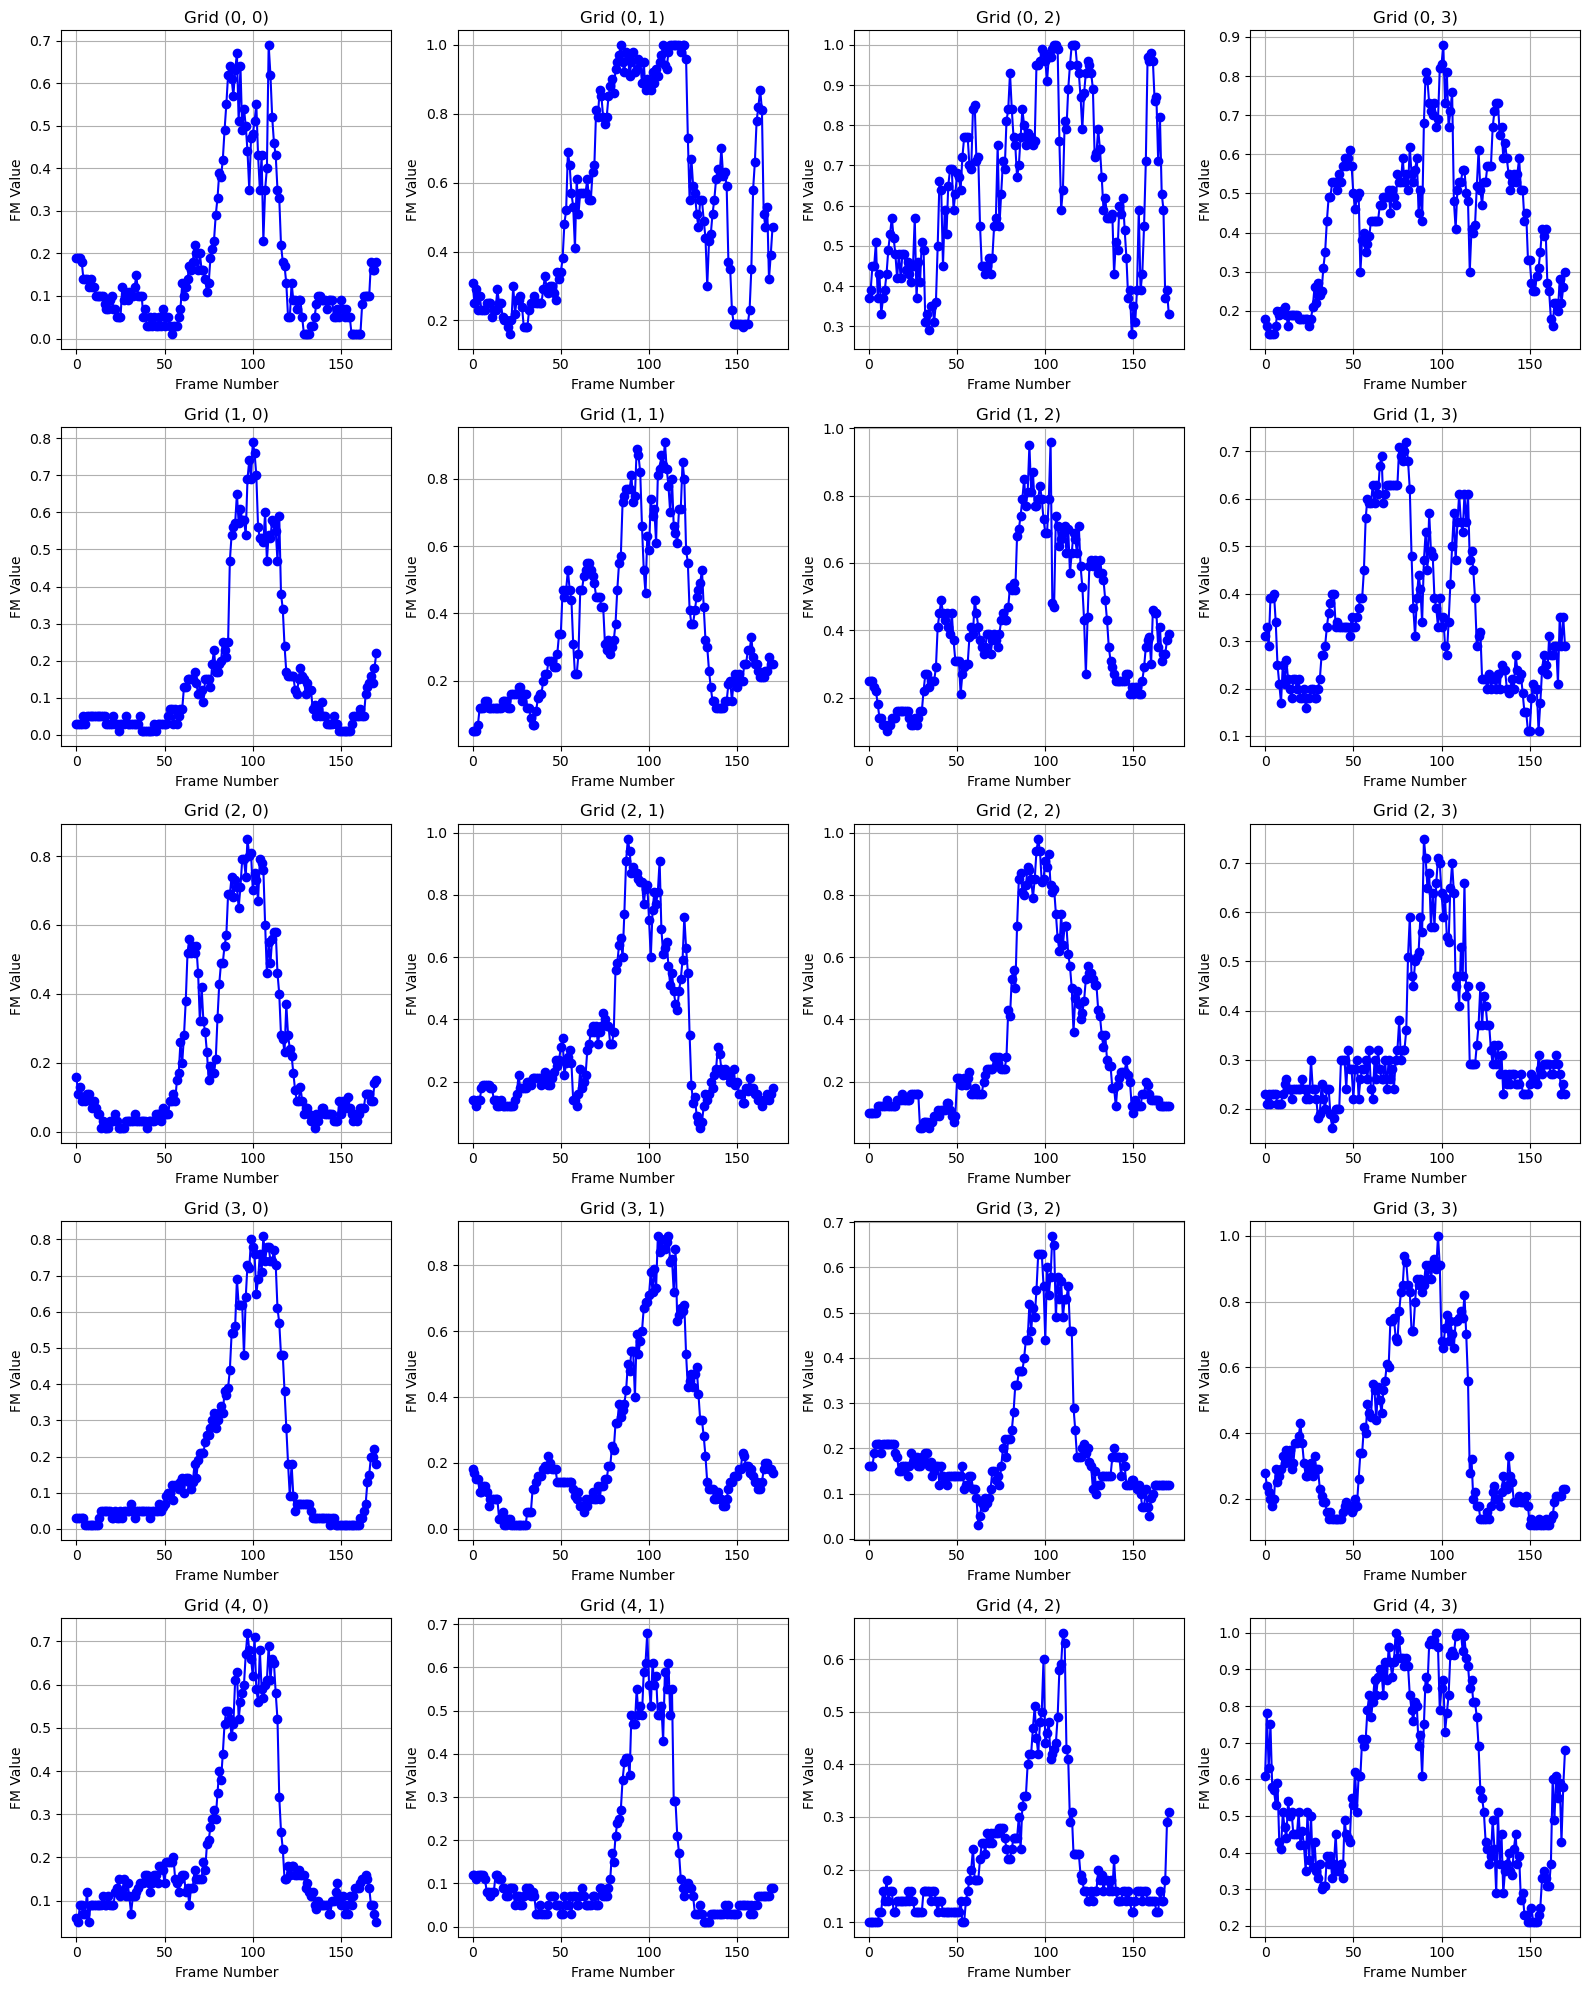

In [45]:
display_video_with_matrix(4, 5, 10, 10)

##### Matriz de 5x5

End of video.


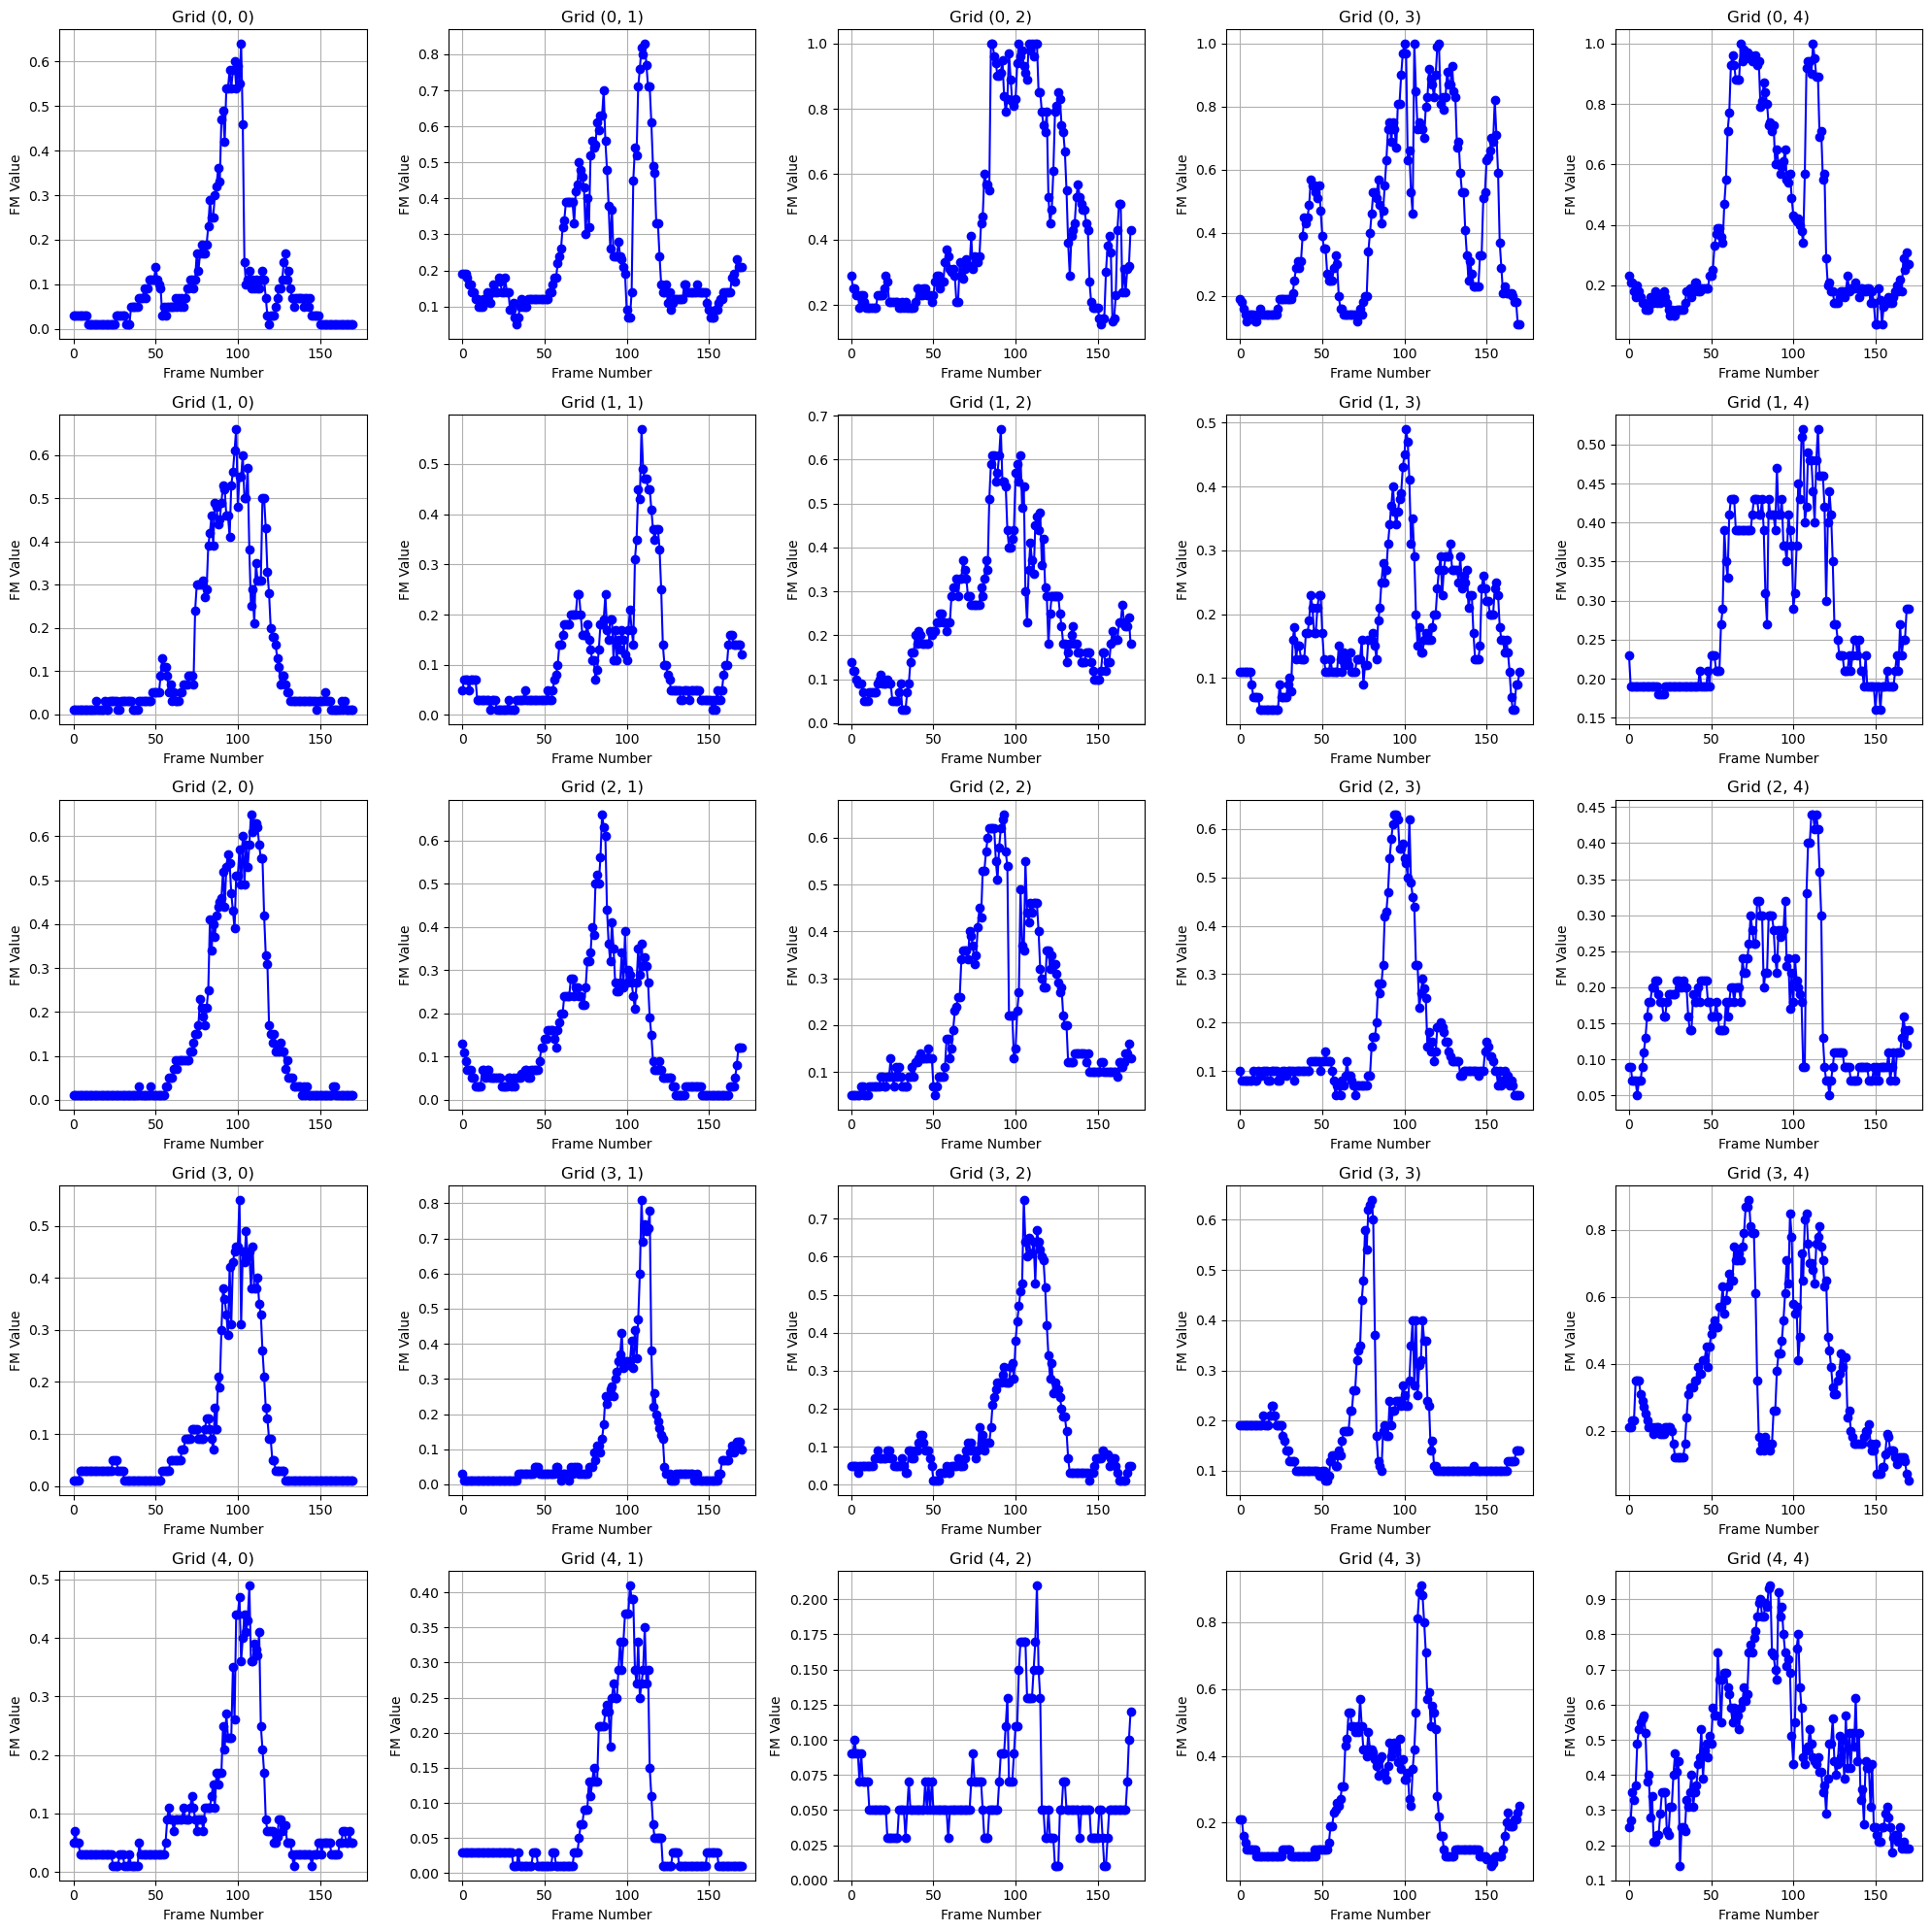

In [24]:
display_video_with_matrix(5, 5, 10, 10)